# 安装NetworkX

In [3]:
# !pip install networkx -i https://pypi.tuna.tsinghua.edu.cn/simple

# 验证安装配置成功

In [4]:
import networkx as nx

In [5]:
nx.__version__

'2.8.4'

# 导入相关包

In [88]:
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

# 设置matplotlib中文字体(windows系统)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

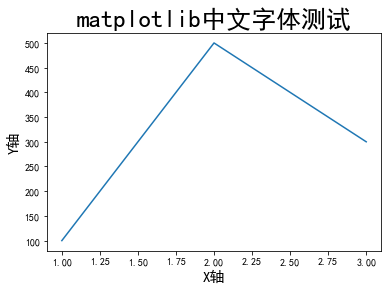

In [8]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

# 经典图结构

## 全连接无向图

In [9]:
G = nx.complete_graph(7)

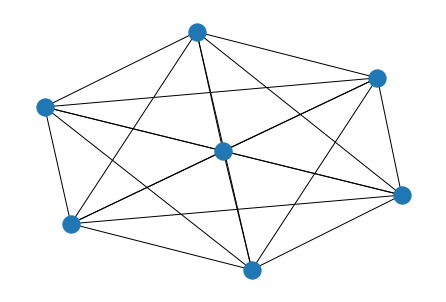

In [10]:
nx.draw(G)

In [11]:
# 查看全图连接数
G.size()

21

## 全连接有向图

In [12]:
G = nx.complete_graph(7, nx.DiGraph())

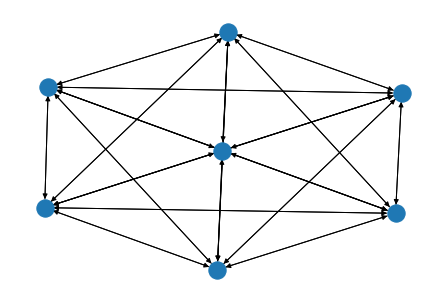

In [13]:
nx.draw(G)

In [14]:
G.is_directed()

True

## 环状图

In [30]:
G = nx.cycle_graph(5)

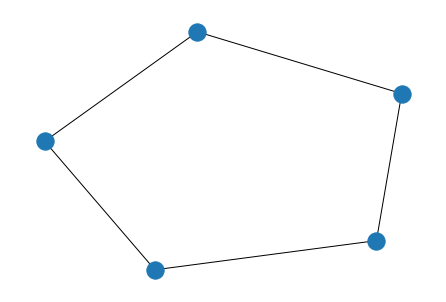

In [31]:
nx.draw(G)

## 梯状图

In [32]:
G = nx.ladder_graph(5)

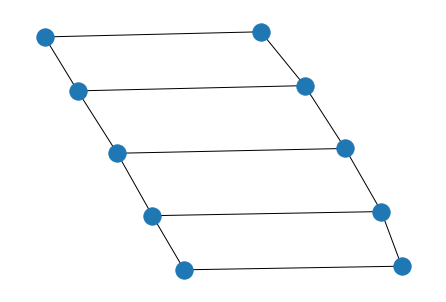

In [33]:
nx.draw(G)

## 线性串珠图

In [34]:
G = nx.path_graph(15)

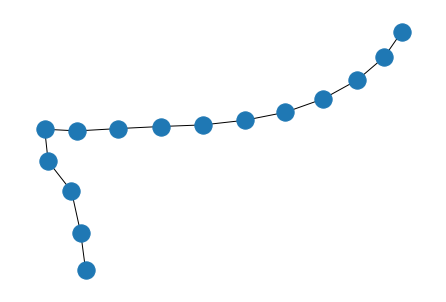

In [35]:
nx.draw(G)

## 星状图

In [36]:
G = nx.star_graph(7)

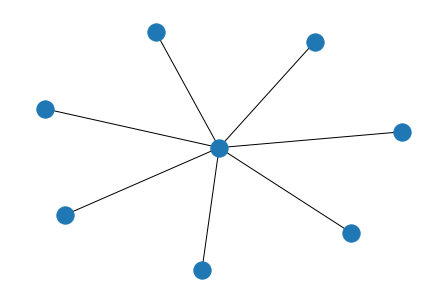

In [37]:
nx.draw(G)

## 轮辐图

In [38]:
G = nx.wheel_graph(8)

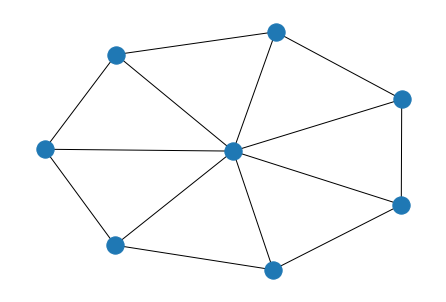

In [39]:
nx.draw(G)

## 二项树

In [41]:
G = nx.binomial_tree(5)

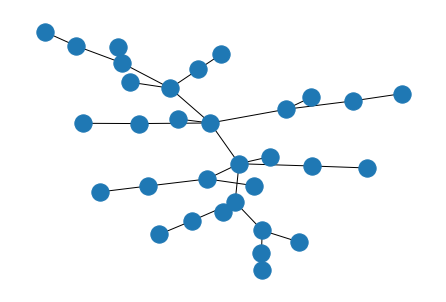

In [42]:
nx.draw(G)

## 栅格图

### 二维矩形网格图

In [43]:
G = nx.grid_2d_graph(3, 5)

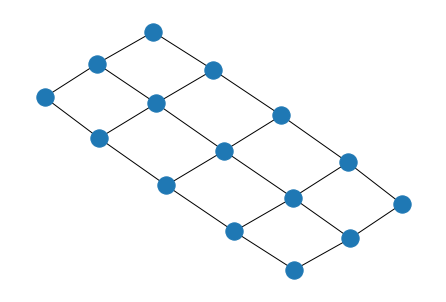

In [44]:
nx.draw(G)

### 多维矩形网格图

In [47]:
G = nx.grid_graph(dim = (2, 3, 4))

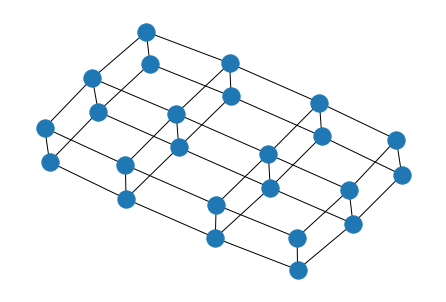

In [48]:
nx.draw(G)

### 二维三角形网格图

In [49]:
G = nx.triangular_lattice_graph(2, 5)

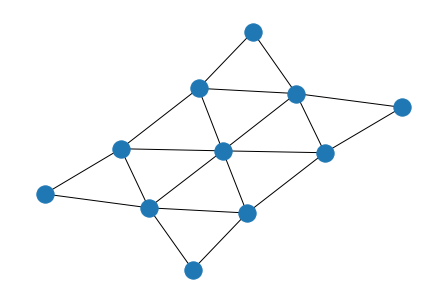

In [50]:
nx.draw(G)

### 二维六边形蜂窝图

In [51]:
G = nx.hexagonal_lattice_graph(2, 3)

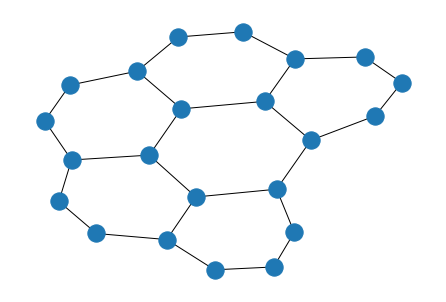

In [52]:
nx.draw(G)

### n维超立方体图

In [53]:
G = nx.hypercube_graph(4)

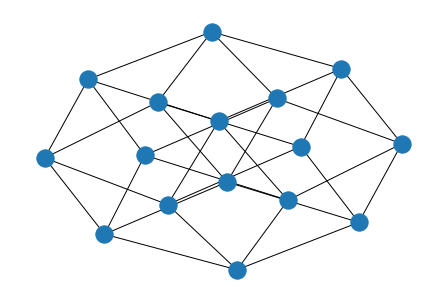

In [54]:
nx.draw(G)

## NetworkX 内置图

In [55]:
G = nx.diamond_graph()

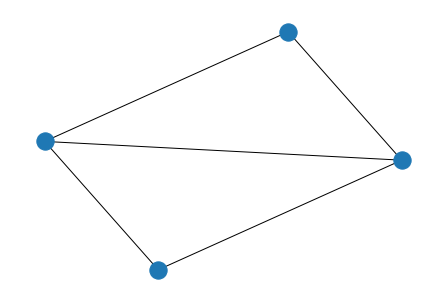

In [56]:
nx.draw(G)

In [57]:
G = nx.bull_graph()

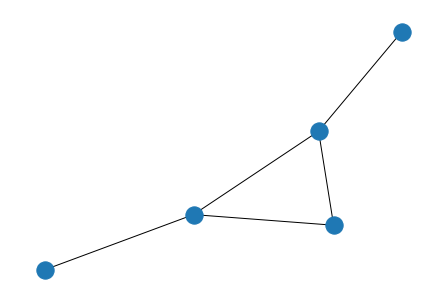

In [58]:
nx.draw(G)

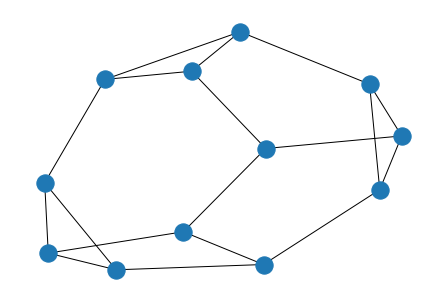

In [59]:
G = nx.frucht_graph()
nx.draw(G)

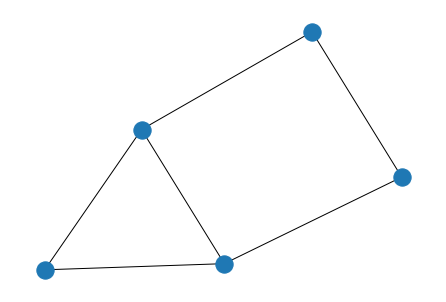

In [60]:
G = nx.house_graph()
nx.draw(G)

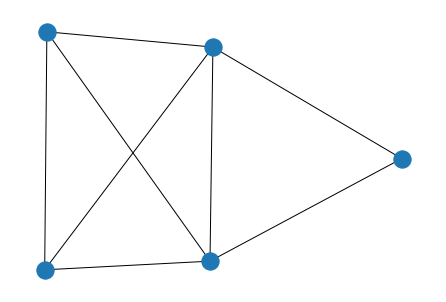

In [61]:
G = nx.house_x_graph()
nx.draw(G)

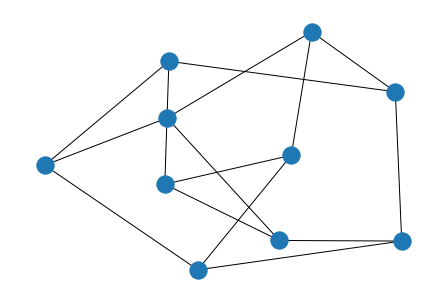

In [62]:
G = nx.petersen_graph()
nx.draw(G)

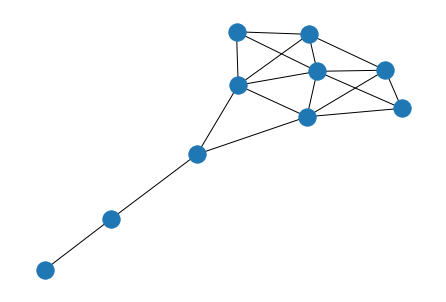

In [63]:
G = nx.krackhardt_kite_graph()
nx.draw(G)

## 随机图

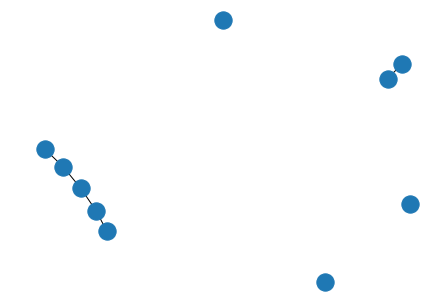

In [86]:
G = nx.erdos_renyi_graph(10, 0.1, seed = 10)
nx.draw(G)

## 有向图

### 无标度有向图

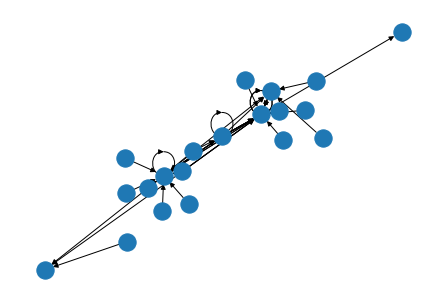

In [67]:
G = nx.scale_free_graph(20)
nx.draw(G)

## 社交网络

### 空手道俱乐部数据集

In [68]:
G = nx.karate_club_graph()

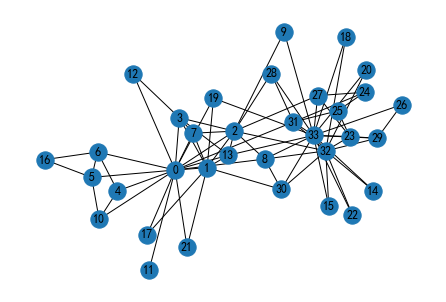

In [69]:
nx.draw(G, with_labels = True)

In [71]:
G.nodes[5]["club"]

'Mr. Hi'

In [72]:
G.nodes[9]["club"]

'Officer'

### 雨果（悲惨世界）人物关系

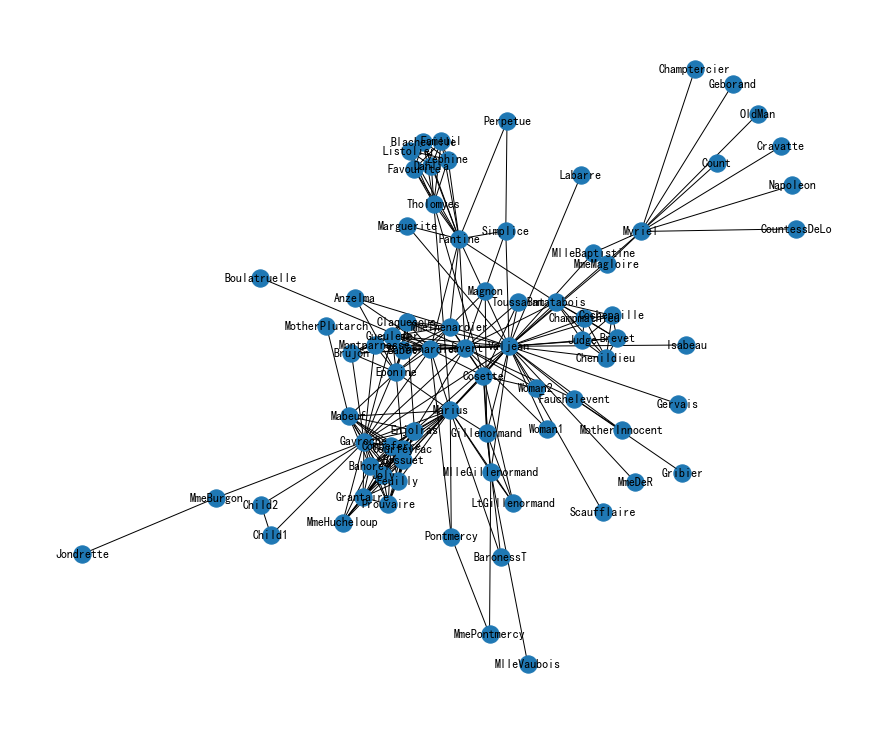

In [75]:
G = nx.les_miserables_graph()
plt.figure(figsize = (12, 10))
pos = nx.spring_layout(G, seed = 10)
nx.draw(G, pos, with_labels = True)

### Florentine families graph

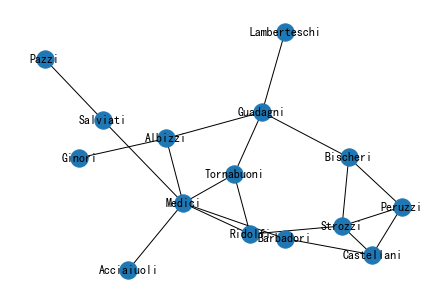

In [76]:
G = nx.florentine_families_graph()
nx.draw(G, with_labels=True)

## 社群聚类图

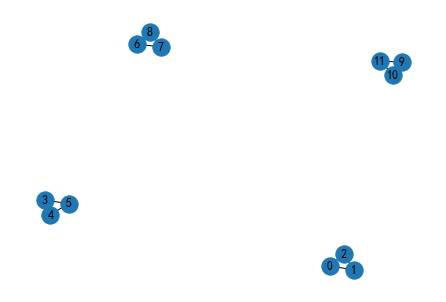

In [77]:
G = nx.caveman_graph(4, 3)
nx.draw(G, with_labels=True)

## 树

In [78]:
tree = nx.random_tree(n=10, seed=0)
print(nx.forest_str(tree, sources=[0]))

╙── 0
    ├── 3
    └── 4
        ├── 6
        │   ├── 1
        │   ├── 2
        │   └── 7
        │       └── 8
        │           └── 5
        └── 9


# 通过连接矩阵和邻接矩阵创建图

## 导入三元组连接表

In [97]:
url = 'D:/桌面/SavarusAlbert.github.io/notebooks/2023.2图机器学习/data/triples.csv'
# f = open(url)
df = pd.read_csv(url)

In [98]:
df

,head,tail,relation,label
0,关羽,刘备,younger_sworn_brother,义弟
1,张飞,刘备,younger_sworn_brother,义弟
2,关羽,张飞,elder_sworn_brother,义兄
3,张苞,张飞,son,儿子
4,关兴,关羽,son,儿子
...,...,...,...,...
148,曹植,曹丕,younger_brother,弟弟
149,马谡,诸葛亮,colleague,同事
150,马谡,刘备,minister,臣
151,孙坚,孙权,father,父亲


In [99]:
G = nx.DiGraph()

In [100]:
edges = [edge for edge in zip(df['head'], df['tail'])]
G.add_edges_from(edges)

In [101]:
G.edges('关羽')

OutEdgeDataView([('关羽', '刘备'), ('关羽', '张飞')])

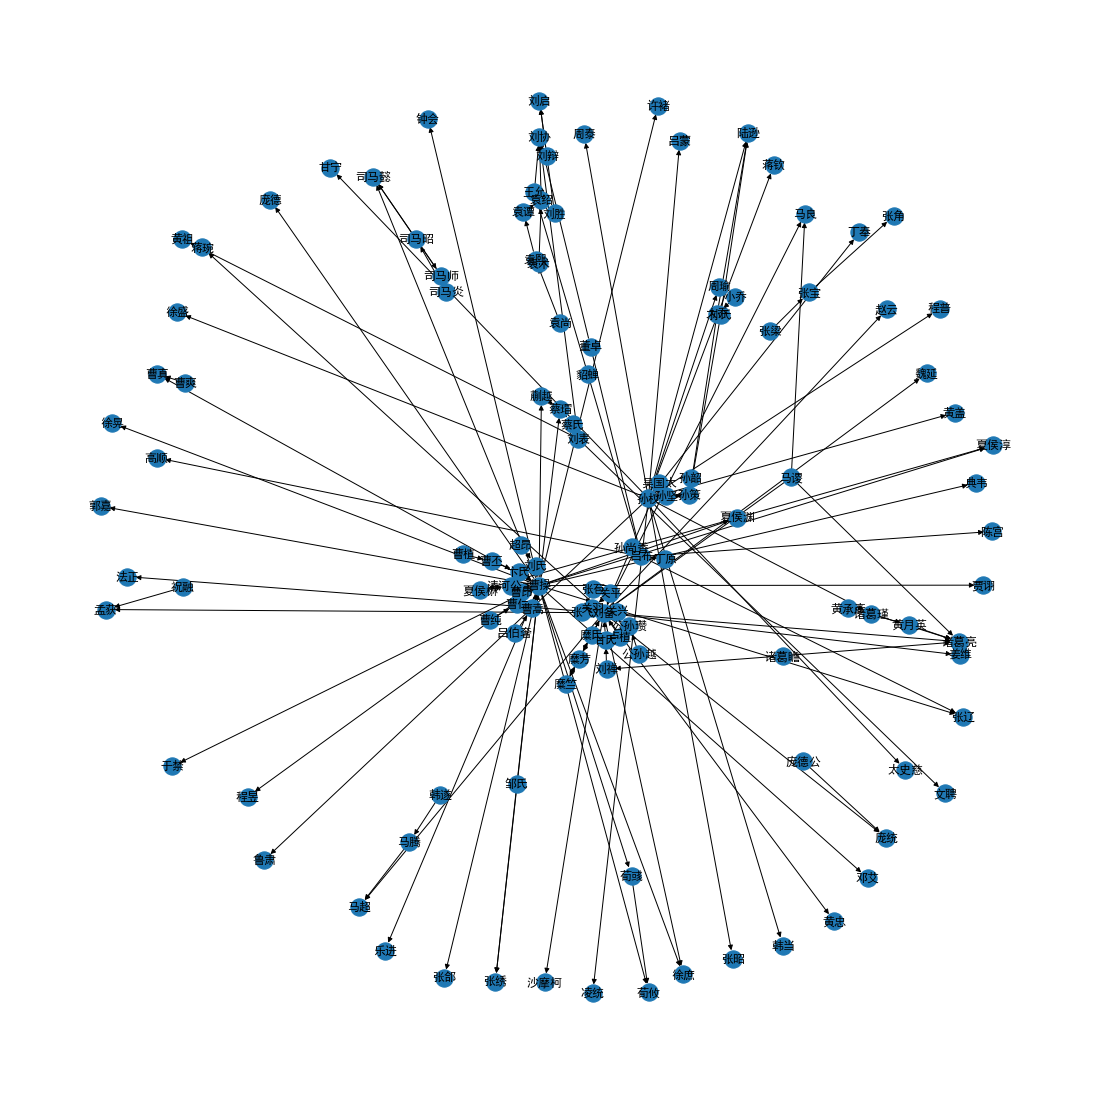

In [102]:
pos = nx.spring_layout(G, seed=123)
plt.figure(figsize = (15, 15))
nx.draw(G, pos, with_labels=True)

In [103]:
G.nodes

NodeView(('关羽', '刘备', '张飞', '张苞', '关兴', '关平', '卢植', '公孙瓒', '甘氏', '刘禅', '诸葛瞻', '诸葛亮', '姜维', '黄月英', '黄承彦', '诸葛瑾', '公孙越', '马超', '马腾', '韩遂', '徐庶', '曹操', '刘胜', '刘启', '刘辩', '孙权', '孙尚香', '糜氏', '糜芳', '糜竺', '魏延', '赵云', '黄忠', '庞统', '法正', '蒋琬', '马良', '孟获', '沙摩柯', '庞德公', '马谡', '祝融', '孙韶', '孙策', '孙氏', '陆逊', '刘协', '董卓', '王允', '貂蝉', '吕布', '丁原', '高顺', '陈宫', '张辽', '刘表', '蔡氏', '蔡瑁', '蒯越', '黄祖', '文聘', '张宝', '张角', '张梁', '袁绍', '袁术', '袁谭', '袁熙', '袁尚', '吴国太', '孙坚', '大乔', '小乔', '周瑜', '丁奉', '徐盛', '鲁肃', '张昭', '蒋钦', '太史慈', '周泰', '凌统', '吕蒙', '甘宁', '黄盖', '韩当', '程普', '曹嵩', '吕伯奢', '邹氏', '张绣', '清河公主', '夏侯楙', '夏侯渊', '夏侯淳', '曹真', '曹爽', '郭嘉', '徐晃', '乐进', '张郃', '许褚', '典韦', '荀彧', '荀攸', '贾诩', '司马懿', '程昱', '于禁', '邓艾', '钟会', '庞德', '司马师', '司马昭', '司马炎', '曹仁', '曹纯', '曹昂', '刘氏', '超昂', '卞氏', '曹丕', '曹植'))

In [108]:
len(G)

123

## 保存并载入邻接表

In [110]:
for line in nx.generate_adjlist(G):
    print(line)

关羽 刘备 张飞
刘备 诸葛亮 马超 徐庶 姜维 糜芳 糜竺 魏延 赵云 黄忠 庞统 法正 蒋琬 马良 孟获 沙摩柯
张飞 刘备
张苞 张飞
关兴 关羽
关平 张苞 关羽
卢植 刘备
公孙瓒 刘备
甘氏 刘备
刘禅 甘氏
诸葛瞻 刘禅 诸葛亮
诸葛亮 姜维
姜维 诸葛亮
黄月英 诸葛亮
黄承彦 黄月英
诸葛瑾 诸葛亮
公孙越 公孙瓒
马超
马腾 马超
韩遂 马腾
徐庶
曹操 徐庶 张辽 蒯越 蔡瑁 张绣 夏侯淳 夏侯渊 曹真 郭嘉 徐晃 乐进 张郃 许褚 典韦 荀彧 荀攸 贾诩 司马懿 程昱 于禁 邓艾 钟会 庞德
刘胜 刘启
刘启
刘辩 刘启
孙权 诸葛瑾 孙策 周瑜 陆逊 丁奉 徐盛 鲁肃 张昭 蒋钦 太史慈 周泰 凌统 吕蒙 甘宁 黄盖 韩当 程普
孙尚香 刘备 吴国太
糜氏 刘备
糜芳 糜氏
糜竺 糜芳
魏延
赵云
黄忠
庞统
法正
蒋琬
马良
孟获
沙摩柯
庞德公 庞统
马谡 马良 诸葛亮 刘备
祝融 孟获
孙韶 孙策
孙策 孙坚
孙氏 陆逊 孙策
陆逊
刘协 刘辩
董卓 刘协 吕布
王允 刘协
貂蝉 王允 吕布
吕布 高顺 陈宫 张辽
丁原 吕布
高顺
陈宫
张辽
刘表 刘协 黄祖 文聘
蔡氏 刘表
蔡瑁 蔡氏
蒯越 蔡瑁
黄祖
文聘
张宝 张角
张角
张梁 张宝
袁绍 刘协
袁术 袁绍
袁谭 袁绍
袁熙 袁谭
袁尚 袁熙
吴国太 孙坚 孙权
孙坚 孙权
大乔 孙策 陆逊
小乔 大乔
周瑜 小乔
丁奉
徐盛
鲁肃
张昭
蒋钦
太史慈
周泰
凌统
吕蒙
甘宁
黄盖
韩当
程普
曹嵩 曹操
吕伯奢 曹嵩
邹氏 曹操 张绣
张绣
清河公主 曹操
夏侯楙 清河公主
夏侯渊 夏侯楙 夏侯淳
夏侯淳
曹真
曹爽 曹真
郭嘉
徐晃
乐进
张郃
许褚
典韦
荀彧 荀攸
荀攸
贾诩
司马懿
程昱
于禁
邓艾
钟会
庞德
司马师 司马懿
司马昭 司马师 司马懿
司马炎 司马昭
曹仁 曹操
曹纯 曹仁
曹昂 曹操
刘氏 曹操
超昂 刘氏
卞氏 曹操
曹丕 卞氏
曹植 曹丕


In [111]:
# 将邻接表导出为本地文件 grid.edgelist
nx.write_edgelist(G, path="D:/桌面/SavarusAlbert.github.io/notebooks/2023.2图机器学习/data/grid.edgelist", delimiter=":")

In [112]:
# 从本地文件 grid.edgelist 读取邻接表
H = nx.read_edgelist(path="D:/桌面/SavarusAlbert.github.io/notebooks/2023.2图机器学习/data/grid.edgelist", delimiter=":")

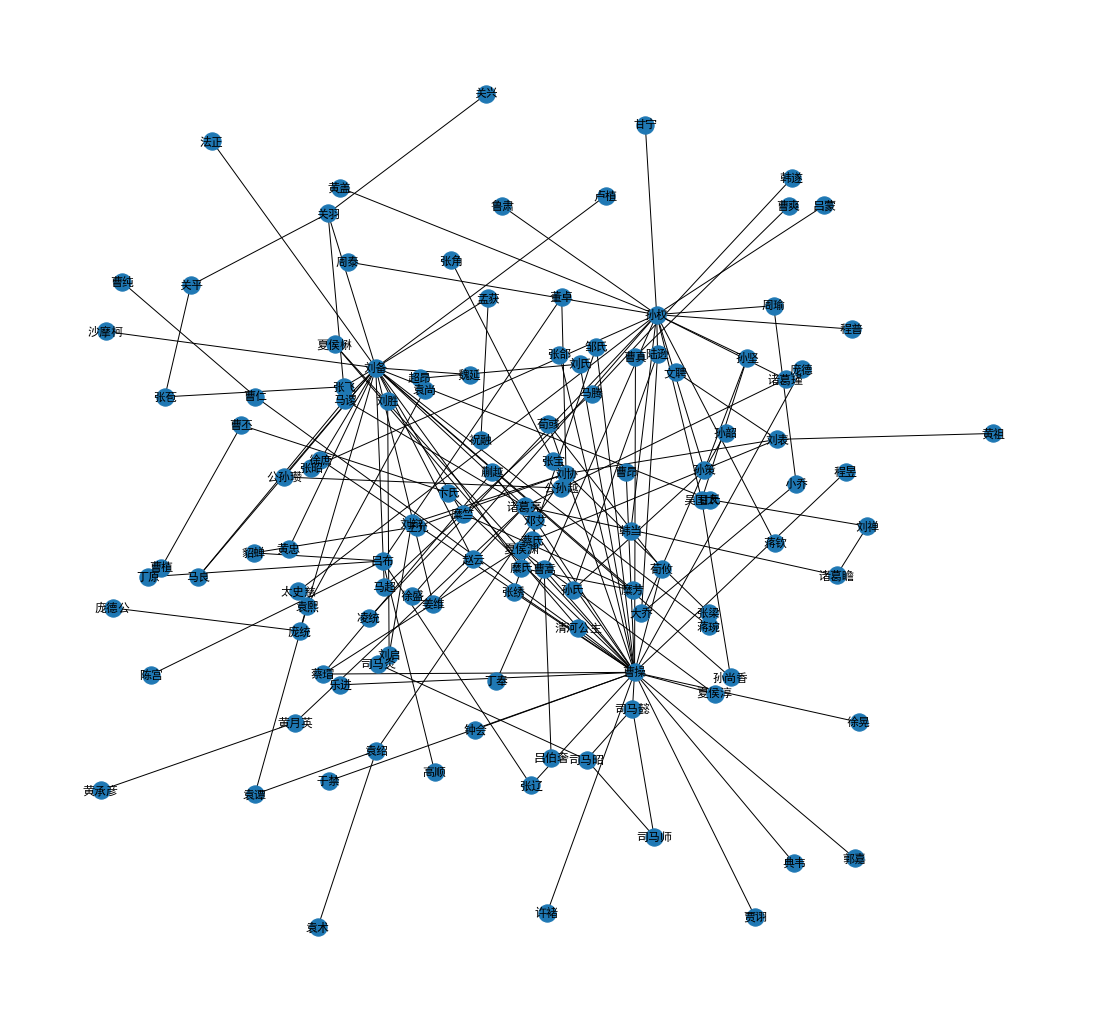

In [113]:
# 可视化
plt.figure(figsize=(15,14))
pos = nx.spring_layout(H, iterations=3, seed=5)
nx.draw(H, pos, with_labels=True)
plt.show()

### 在图的边缘留白，防止节点被截断

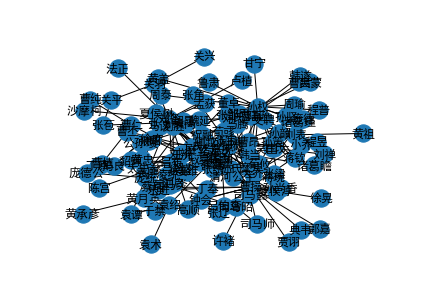

In [117]:
nx.draw(H, pos, with_labels=True)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()